In [1]:
#%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import date
import openweathermapy.core as owm
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Resources/cities.csv"
# Output files (PNG)
temp_file="Resources/images/Fig1.png"
humidity_file="Resources/images/Fig2.png"
cloud_file="Resources/images/Fig3.png"
wind_file="Resources/images/Fig4.png"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#date for labeling graphs
today=str(date.today())

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


622

## Perform API Calls

In [3]:
# OpenWeatherMap url = "http://api.openweathermap.org/data/2.5/weather?"
# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}
summary=["name","id","coord.lat","wind.speed","main.temp","main.humidity","clouds.all"]


In [4]:
summary_data=[]
for city in cities:
    try:
        current_weather=owm.get_current(city, **settings)
        city_data=current_weather(*summary)
        summary_data.append(city_data)
        print(f"Processing {current_weather['name']} with id {current_weather['id']} ")        
    except:
        print(f"{city} not found")

#convert to dataframe and name columns        
summary_df=pd.DataFrame(summary_data)
summary_df=summary_df.rename(columns={0:"name",1:"id",2:"lat",3:"windspeed",4:"temp",5:"humidity",6:"cloudiness"})
#save to file
summary_df.to_csv(output_data_file,index=False,header=True)
#confirm sufficient count after cities found
summary_df.count()

Processing Mataura with id 6201424 
Processing Ushuaia with id 3833367 
umzimvubu not found
Processing Ponta do Sol with id 3453439 
Processing Ribeira Grande with id 3372707 
Processing Kavaratti with id 1267390 
Processing Longyearbyen with id 2729907 
Processing Alta Floresta with id 6316343 
Processing Saldanha with id 2737599 
Processing Thinadhoo with id 1337610 
Processing Qaanaaq with id 3831208 
Processing The Pas with id 6164499 
Processing Bluff with id 2175403 
Processing Klooga with id 591306 
Processing Jamestown with id 2069194 
Processing Yellowknife with id 6185377 
Processing Albany with id 5106834 
Processing Americus with id 4179667 
Processing Avarua with id 4035715 
Processing Daru with id 2409663 
Processing Talnakh with id 1490256 
Processing Busselton with id 2075265 
Processing Atikokan with id 5888001 
Processing Xucheng with id 1787831 
Processing Saiha with id 1257771 
Processing Atuona with id 4020109 
Processing Port Elizabeth with id 4501427 
Processing 

Processing Namibe with id 3347019 
Processing Shingu with id 1847947 
Processing Kharp with id 1503726 
Processing Provideniya with id 4031574 
Processing Veraval with id 3031871 
Processing Mocajuba with id 3394745 
Processing Bereznik with id 577240 
Processing Cam Ranh with id 1586350 
falealupo not found
chaochou not found
Processing Hailar with id 2037078 
Processing Saint-Pierre with id 2995603 
Processing Wanaka with id 2184707 
Processing Georgetown with id 3378644 
samalaeulu not found
Processing Mvomero with id 155334 
kasra not found
Processing Faanui with id 4034551 
Processing Zarechnyy with id 545353 
Processing Bathsheba with id 3374083 
Processing Zhaotong with id 1784841 
Processing Halifax with id 6324729 
Processing Mandiana with id 2417795 
Processing Almaznyy with id 582447 
Processing Augusto Correa with id 3406961 
Processing Dunedin with id 2191562 
jubayl not found
Processing Mayo with id 6068416 
Processing Longjiang with id 2035970 
Processing Acari with id 3

Processing Port Lincoln with id 2063036 
tasbuget not found
Processing Pangody with id 1495626 
Processing Bonthe with id 2409914 
Processing Kyren with id 2021031 
Processing Birjand with id 140463 
Processing Nhulunbuy with id 2064735 
Processing Rio Verde de Mato Grosso with id 3451051 
Processing Nur with id 763513 
Processing Sarangani with id 1687186 
alotau not found
Processing Ulcinj with id 3188516 
Processing Salalah with id 286621 
Processing Conil with id 2985020 
Processing Takanabe with id 1851068 
Processing Tadine with id 2138285 
Processing Yinchuan with id 1786657 
Processing Northam with id 2641434 
Processing Luau with id 876177 
Processing Filingue with id 2444995 
Processing Manokwari with id 1636308 
Processing Coquimbo with id 3893629 
Processing Saurimo with id 145531 
Processing Galveston with id 4920577 
Processing Along with id 1278969 
Processing Aukra with id 3145580 
Processing Kasungu with id 928534 
Processing Harper with id 4696310 
Processing Muisne w

name          552
id            552
lat           552
windspeed     552
temp          552
humidity      552
cloudiness    552
dtype: int64

In [5]:
summary_df.head()

,name,id,lat,windspeed,temp,humidity,cloudiness
0,Mataura,6201424,-46.19,5.73,61.14,74,0
1,Ushuaia,3833367,-54.81,28.86,51.22,57,75
2,Ponta do Sol,3453439,-20.63,3.94,80.72,61,20
3,Ribeira Grande,3372707,38.52,26.40,64.40,88,75
4,Kavaratti,1267390,10.57,7.18,82.02,100,0


In [6]:
#for all scatter plots
def weather_scat (index,column,y_label,fig_title,outfile_name):
    """
    index determines color graph
    column - str for the column in summary_df to use for y values
    y_label - the y axis label (x_axis is latitude values)
    fig-title - the graph title
    outfile_name -  .png file for saving the graph 
    """
    
    colors=("red","blue","grey","green")
    fig,ax=plt.subplots(figsize=(7,7),facecolor="lightgrey")
    ax.set_facecolor('white')
 #set x axis   
    x_axis=summary_df["lat"]
    ax.set_xlabel("Latitude",fontsize=12)
 #set y axis   
    y_data=summary_df[column]
    ax.set_ylabel(y_label,fontsize=12)
#plot and save to file    
    ax.grid()
    fig.suptitle(fig_title, fontsize=16)
    ax.scatter(x_axis,y_data,marker='o',facecolor=colors[index],edgecolor="black")
    plt.savefig(outfile_name)
    plt.show()
    return

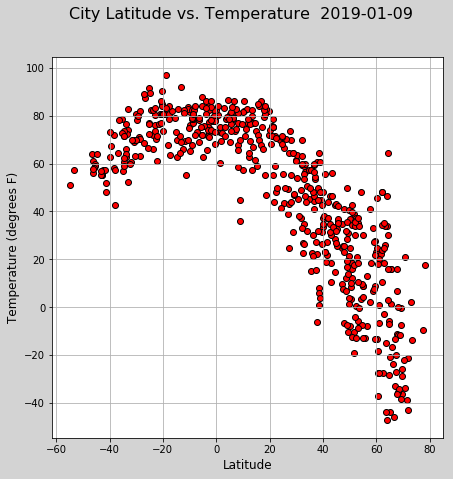

In [7]:
#Temp vs Lat scatterplot
weather_scat(0,"temp","Temperature (degrees F)","City Latitude vs. Temperature  "+today,temp_file)

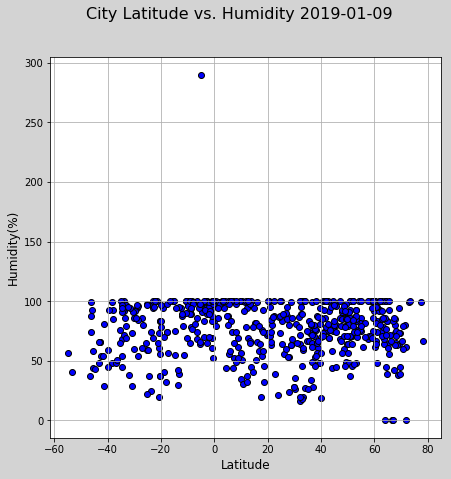

In [11]:
#humidity vs latitude scatterplot
weather_scat(1,"humidity","Humidity(%)","City Latitude vs. Humidity "+today,humidity_file)


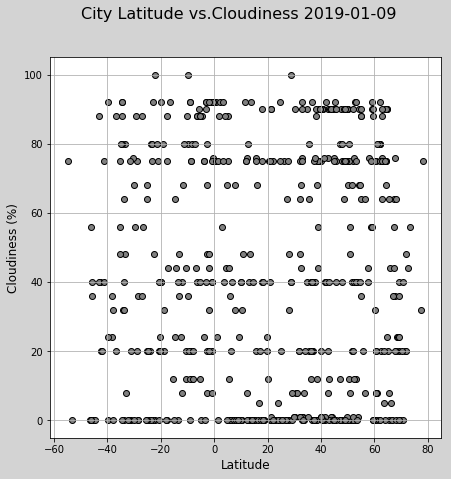

In [9]:
#cloudiness vs latitude
weather_scat(2,"cloudiness","Cloudiness (%)","City Latitude vs.Cloudiness "+today,cloud_file)


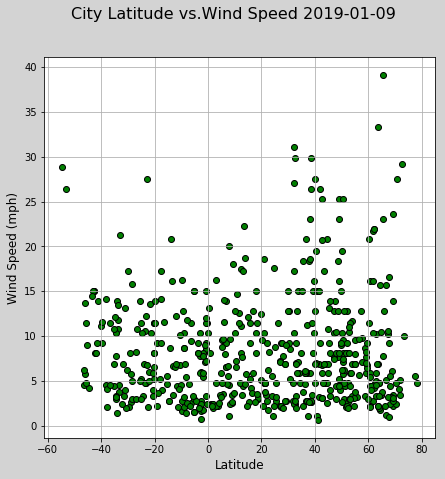

In [10]:
#wind speed vs latitude
weather_scat(3,"windspeed","Wind Speed (mph)","City Latitude vs.Wind Speed "+today,wind_file)
